In [22]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Load Data
df = pd.read_csv('/home/muskan/Downloads/Dataset ImDb reviews/IMDB Dataset.csv')
df = df.sample(n=5000).reset_index(drop=True)
df.head()

,review,sentiment
0,This sickly sweet and laboriously paced 5-reel...,negative
1,I was lucky enough to have seen this film at i...,positive
2,I cant believe blockbuster carries this movie....,negative
3,The Lion King 1 1/2 is a very cute story to go...,positive
4,Whatever possessed Guy Ritchie to remake Wertm...,negative


In [25]:
# Preprocess Data
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_review_with_stopwords_and_stemming(review):
    review = html.unescape(review)
    review = re.sub(r'<.*?>','',review) # html remove
    review = review.lower() # text lower case
    
    review = re.sub(r'[^a-z\s]','', review)
    
    words = review.split()
    
    cleaned_review = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(cleaned_review)

# Example usage on your dataset
import pandas as pd

df['review'] = df['review'].apply(clean_review_with_stopwords_and_stemming)

df

[nltk_data] Downloading package stopwords to /home/muskan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,sickli sweet labori pace reeler definit among ...,negative
1,lucki enough seen film seattl film fest screen...,positive
2,cant believ blockbust carri movi bad total foo...,negative
3,lion king cute stori go along lion king basic ...,positive
4,whatev possess guy ritchi remak wertmul film i...,negative
...,...,...
4995,fail id love give crap ye regist rate garbag w...,negative
4996,mani movi go odd ragtag team beat big guy mone...,negative
4997,viggo mortensen star new inmat haunt prison wa...,positive
4998,variou law order csi franchis better glad dolo...,positive


In [26]:
# Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,sickli sweet labori pace reeler definit among ...,0
1,lucki enough seen film seattl film fest screen...,1
2,cant believ blockbust carri movi bad total foo...,0
3,lion king cute stori go along lion king basic ...,1
4,whatev possess guy ritchi remak wertmul film i...,0


In [30]:
# Train Test Split
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.1, random_state=RANDOM_STATE)

In [41]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

text_train = tokenizer.texts_to_sequences(X_train)
text_test = tokenizer.texts_to_sequences(X_test)

text_train

vocab_size = len(tokenizer.word_index) + 1
maxlen = max(len(x) for x in text_train)

maxlen, vocab_size

text_train = pad_sequences(text_train, padding='post', maxlen=maxlen)
text_test = pad_sequences(text_test, padding='post', maxlen=maxlen)


array([[  95,  199, 2491, ...,    0,    0,    0],
       [5843, 3424, 1039, ...,    0,    0,    0],
       [  30,  680,  368, ...,    0,    0,    0],
       ...,
       [  19, 2139,  143, ...,    0,    0,    0],
       [ 519,  199,   95, ...,    0,    0,    0],
       [ 136,    2,  523, ...,    0,    0,    0]], dtype=int32)

In [50]:
# CNN Architecture
embedding_dim = 100

model = Sequential()

model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 1, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 621, 100)          3771600   
                                                                 
 conv1d_4 (Conv1D)           (None, 621, 128)          12928     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,785,829
Trainable params: 3,785,829
Non-trainable params: 0
____________________________________________

In [51]:
history = model.fit(text_train, y_train, epochs=5, batch_size=64, verbose=True, validation_data=(text_test, y_test))


Epoch 1/5
71/71 [==============================] - 8s 104ms/step - loss: 0.6152 - accuracy: 0.7442 - val_loss: 0.4892 - val_accuracy: 0.7900
Epoch 2/5
71/71 [==============================] - 7s 101ms/step - loss: 0.3494 - accuracy: 0.8738 - val_loss: 0.3560 - val_accuracy: 0.8420
Epoch 3/5
71/71 [==============================] - 7s 100ms/step - loss: 0.1793 - accuracy: 0.9464 - val_loss: 0.3529 - val_accuracy: 0.8580
Epoch 4/5
71/71 [==============================] - 7s 102ms/step - loss: 0.0728 - accuracy: 0.9867 - val_loss: 0.3678 - val_accuracy: 0.8600
Epoch 5/5
71/71 [==============================] - 7s 99ms/step - loss: 0.0248 - accuracy: 0.9984 - val_loss: 0.3995 - val_accuracy: 0.8540


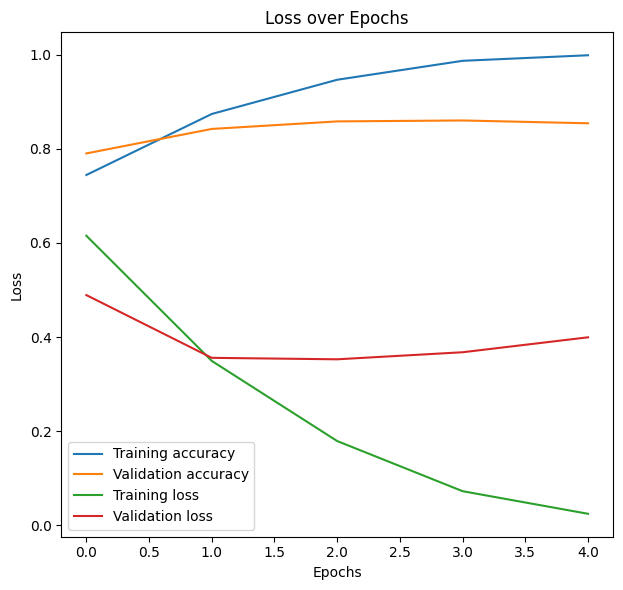

In [54]:
# Visualize accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

16/16 [==============================] - 0s 9ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       244
           1       0.86      0.85      0.86       256

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



<AxesSubplot:>

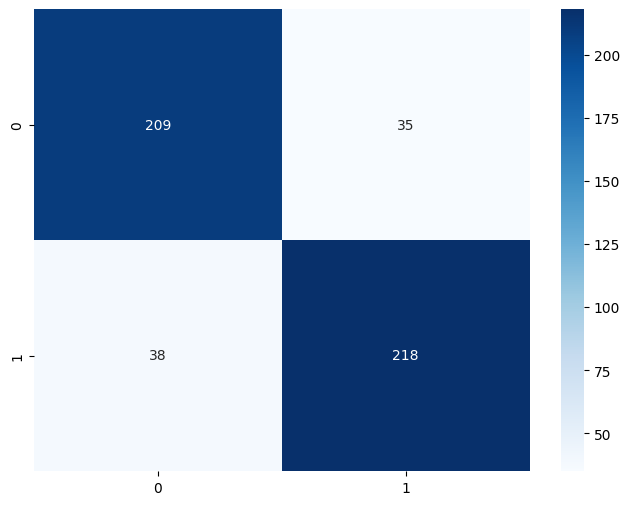

In [60]:
# Confusion and Classification reports

import seaborn as sns

y_pred = model.predict(text_test)
y_pred = (y_pred > 0.5).astype(int)
# y_pred

print("Classification Report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [69]:
# Predict script

def predict_Sentiment(review, tokenizer, model, maxlen):
    text = clean_review_with_stopwords_and_stemming(review)
    
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=maxlen)
    
    prediction = model.predict(padded_sequence)[0][0]
    
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

In [70]:
input_text = "This movie is amazing!"
predict_Sentiment(input_text, tokenizer, model, maxlen)

1/1 [==============================] - 0s 23ms/step


'Positive'

In [72]:
input_text = "It was bad movie"
predict_Sentiment(input_text, tokenizer, model, maxlen)

1/1 [==============================] - 0s 24ms/step


'Negative'

In [73]:
# Save model and Tokenizer

model.save('cnn_sent_model.h5')

import pickle
pickle.dump(tokenizer, open("tokenizer.pkl", "wb"))